In [1]:
from os import listdir
from os.path import isfile, join
import os
import pandas
import matplotlib.pyplot as plt
onlyfiles = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]

In [2]:
def reader_columns_from_file(*columnNames):
    def reader(fileName):
        df = pandas.read_json(fileName, lines=True)
        return df[list(columnNames)]
    return reader

In [3]:
reader_citation_title_year = reader_columns_from_file("title", "n_citation", "year")

In [4]:
import re
dblp_part_regex = re.compile("dblp_part*")
part_files_filter_obj = filter(lambda file_name: dblp_part_regex.match(file_name), onlyfiles)

In [5]:
part_files = list(part_files_filter_obj)

In [6]:
list_of_dataframes = list(map(reader_citation_title_year, part_files))

In [7]:
df = pandas.concat(list_of_dataframes, ignore_index=True)

In [8]:
df.shape

(4107299, 3)

In [9]:
df.columns

Index(['title', 'n_citation', 'year'], dtype='object')

In [10]:
grouped_by_year = df.groupby("year")

In [11]:
max_citation_in_year = df.loc[grouped_by_year["n_citation"].idxmax()]

In [12]:
mean_by_year = pandas.DataFrame(grouped_by_year["n_citation"].mean()).reset_index()

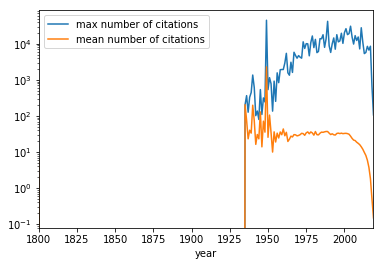

In [13]:
ax = max_citation_in_year.plot(x="year", y="n_citation", label="max number of citations")
mean_by_year.plot(x="year", y="n_citation", label="mean number of citations", ax=ax)
plt.yscale("log")

So there is no point to visualize 1800-1930

In [14]:
reduced_max_citation_per_year = max_citation_in_year[max_citation_in_year["year"] > 1930]
reduced_mean_by_year = mean_by_year[mean_by_year["year"] > 1930]

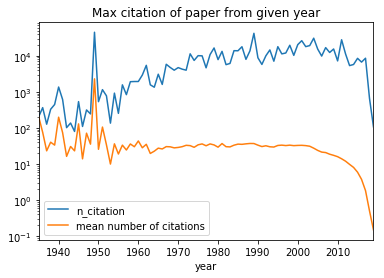

In [15]:
ax = reduced_max_citation_per_year.plot(x="year", y="n_citation", title="Max citation of paper from given year")
reduced_mean_by_year.plot(x="year", y="n_citation", label="mean number of citations", ax=ax)
plt.yscale("log")